<a href="https://colab.research.google.com/github/chaerui7967/stock_predict_news_and_youtube/blob/master/%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90_%EC%A3%BC%EC%8B%9D_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 삼성전자 주식 예측

### 데이터 불러오기

In [ ]:
# 필요 모듈 설치
!pip install finance-datareader
!pip install opendartreader
!pip install --upgrade opendartreader

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 주식가격 로딩
import FinanceDataReader as fdr

# 재무재표 로딩
import OpenDartReader

## EDA

### 주식 EDA

In [ ]:
start_date = '20110101'  # 2011년 부터 10간의 데이터를 추출
end_date = '20210826'
sample_code = '005930'
stock = fdr.DataReader( sample_code, start = start_date, end = end_date )
stock

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2011-01-03,19100,19320,19000,19160,265562,0.009484
2011-01-04,19120,19219,18980,19160,274488,0.000000
2011-01-05,19100,19100,18840,18840,336224,-0.016701
2011-01-06,18840,18980,18460,18600,387488,-0.012739
2011-01-07,18300,18580,18280,18420,463447,-0.009677
...,...,...,...,...,...,...
2021-08-20,73500,73900,72500,72700,22364803,-0.005472
2021-08-23,73300,74000,73000,73300,19384648,0.008253
2021-08-24,73900,75700,73900,75600,21016913,0.031378


Text(0, 0.5, 'price')

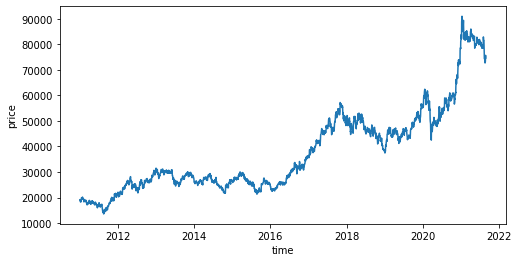

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

### 거래량과 종가 간의 관계 확인

In [ ]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2011-01-03,19100,19320,19000,19160,265562,0.009484
2011-01-04,19120,19219,18980,19160,274488,0.000000
2011-01-05,19100,19100,18840,18840,336224,-0.016701
2011-01-06,18840,18980,18460,18600,387488,-0.012739
2011-01-07,18300,18580,18280,18420,463447,-0.009677


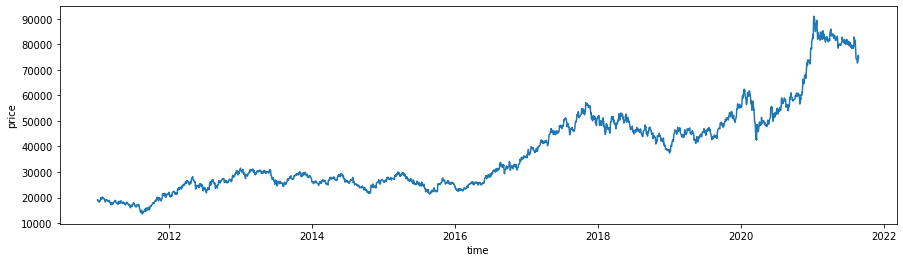

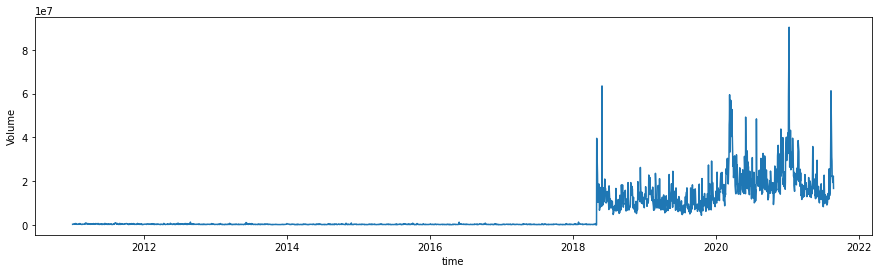

In [ ]:
plt.figure(figsize=(15, 4))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

plt.figure(figsize=(15, 4))
sns.lineplot(y=stock['Volume'], x=stock.index)
plt.xlabel('time')
plt.ylabel('Volume')
plt.show()

#### 2018년 거래량 증폭
- https://www.yna.co.kr/view/AKR20180504037752008
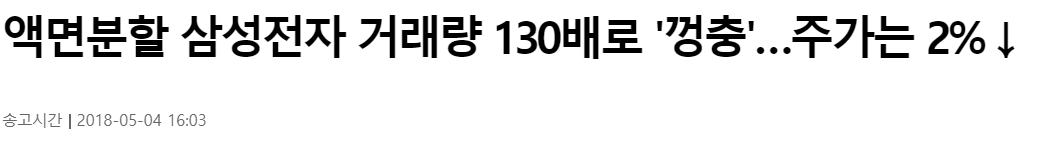

In [ ]:
# 2018이후 거래량이 증가 
stock[stock.index >= '2018-04-25'].head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-04-25,49220,50500,49220,50400,332292,-0.001189
2018-04-26,50420,52160,50400,52140,360931,0.034524
2018-04-27,53380,53639,52440,53000,606216,0.016494
2018-04-30,0,0,0,53000,0,0.000000
2018-05-02,0,0,0,53000,0,0.000000
2018-05-03,0,0,0,53000,0,0.000000
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319


 - 거래량의 차이가 있어 분석에 영향을 줄수 있으므로 분석기간을 2018년 5월 4일 이후 데이터를 사용하여 분석을 진행

 - 두 연속형변수간의 상관성을 파악하기 위해서 피어슨 상관계수를 활용

In [ ]:
stock_re = stock[stock.index >= '2018-05-04']

In [ ]:
stock_re.corr()['Close'].sort_values(ascending = False)[1:]

High      0.999281
Low       0.999211
Open      0.998409
Volume    0.374137
Change    0.042913
Name: Close, dtype: float64

- Close - Volume 의 피어슨 상관계수는 0.374137 로 약한 양의 상관성이 있는 것으로 보인다. 하지만 이것만으로 Close를 예측하는 것은 무리가 있어 보인다.

#### 주식 가격의 변동율을 통해서 가격등락 예측
- 시계열 정상성을 성립을 위해서

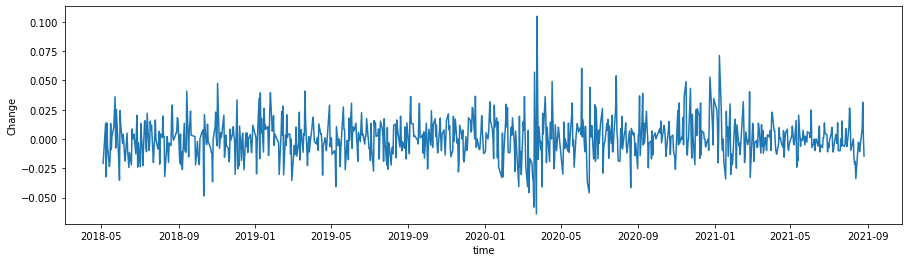

In [ ]:
plt.figure(figsize=(15, 4))
sns.lineplot(y=stock_re['Change'], x=stock_re.index)
plt.xlabel('time')
plt.ylabel('Change')
plt.show()

In [ ]:
import numpy as np

In [ ]:
stock_re['UD'] = np.where(stock_re['Change'] > 0, 1, np.where(stock_re['Change'] == 0, 0, -1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
stock_re.UD.value_counts()

 1    400
-1    377
 0     40
Name: UD, dtype: int64

In [ ]:
stock_re.head()

,Open,High,Low,Close,Volume,Change,UD
Date,,,,,,,
2018-05-04,53000,53900,51800,51900,39565391,-0.020755,-1
2018-05-08,52600,53200,51900,52600,23104720,0.013487,1
2018-05-09,52600,52800,50900,50900,16128305,-0.032319,-1
2018-05-10,51700,51700,50600,51600,13905263,0.013752,1
2018-05-11,52000,52200,51200,51300,10314997,-0.005814,-1


### 데이터 전처리

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'UD']
# 스케일 후 columns
scaled = scaler.fit_transform(stock_re[scale_cols])
scaled

array([[0.29422895, 0.27533784, 0.28395062, ..., 0.40930157, 0.25579124,
        0.        ],
       [0.28666036, 0.26351351, 0.28584995, ..., 0.21767481, 0.45890951,
        1.        ],
       [0.28666036, 0.25675676, 0.2668566 , ..., 0.13645893, 0.18719175,
        0.        ],
       ...,
       [0.6896878 , 0.64358108, 0.7037037 , ..., 0.19336962, 0.56503215,
        1.        ],
       [0.73320719, 0.65878378, 0.72269706, ..., 0.20853559, 0.38675064,
        1.        ],
       [0.73131504, 0.65202703, 0.71699905, ..., 0.14278246, 0.2927089 ,
        0.        ]])

In [ ]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Change,UD
0,0.294229,0.275338,0.283951,0.269841,0.409302,0.255791,0.0
1,0.286660,0.263514,0.285850,0.282913,0.217675,0.458910,1.0
2,0.286660,0.256757,0.266857,0.251167,0.136459,0.187192,0.0
3,0.269631,0.238176,0.261159,0.264239,0.110579,0.460481,1.0
4,0.275307,0.246622,0.272555,0.258637,0.068783,0.344417,0.0


### train / test 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('UD', 1), df['UD'], test_size=0.2, random_state=0, shuffle=False)

In [ ]:
x_train.shape, y_train.shape

((653, 6), (653,))

In [ ]:
x_test.shape, y_test.shape

((164, 6), (164,))

In [117]:
import tensorflow as tf

In [118]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

WINDOW_SIZE=20
BATCH_SIZE=32

In [119]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [145]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, feature갯수): (32, 1)


#### 모델

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential()

model.add(LSTM(64,
               input_shape = (None, 1),
               return_sequences= True))
model.add(LSTM(64,
               input_shape = (None, 1),
               return_sequences = False))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1, activation = 'softmax'))


In [122]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, None, 64)          16896     
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 52,033
Trainable params: 52,033
Non-trainable params: 0
_________________________________________________________________


In [123]:
optimizer = Adam(0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [128]:
# earlystopping은 10번 epoch동안 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor = 'val_accuracy',
                              mode = 'max',
                              patience = 50,
                              verbose = 1)
# 체크포인터도 생성합니다.
checkpoint = ModelCheckpoint('best.h5',
                             monitor='val_accuracy',
                             mode = 'max',
                             save_best_only = True, 
                             verbose=1)

In [129]:
history = model.fit(train_data,
                    epochs=1000, 
                    batch_size = 1,
                    validation_data=(test_data), 
                    callbacks=[checkpoint, earlystopping],
                    verbose=1)

Epoch 1/1000
20/20 [==============================] - 1s 24ms/step - loss: 0.0000e+00 - accuracy: 0.5087 - val_loss: 0.0000e+00 - val_accuracy: 0.4097

Epoch 00001: val_accuracy improved from -inf to 0.40972, saving model to best.h5
Epoch 2/1000
20/20 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - accuracy: 0.5087 - val_loss: 0.0000e+00 - val_accuracy: 0.4097

Epoch 00002: val_accuracy did not improve from 0.40972
Epoch 3/1000
20/20 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - accuracy: 0.5087 - val_loss: 0.0000e+00 - val_accuracy: 0.4097

Epoch 00003: val_accuracy did not improve from 0.40972
Epoch 4/1000
20/20 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - accuracy: 0.5087 - val_loss: 0.0000e+00 - val_accuracy: 0.4097

Epoch 00004: val_accuracy did not improve from 0.40972
Epoch 5/1000
20/20 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - accuracy: 0.5087 - val_loss: 0.0000e+00 - val_accuracy: 0.

In [130]:
model.load_weights('best.h5')

In [131]:
pred = model.predict(test_data)

In [149]:
print(test_data.take(1))

<TakeDataset shapes: ((None, None, 1), (None, 1)), types: (tf.float64, tf.float64)>


In [140]:
pred.shape

(144, 1)

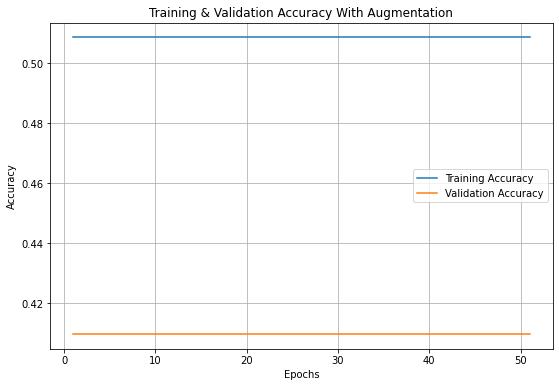

In [132]:
epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('Training & Validation Accuracy With Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [136]:
model.evaluate(test_data, batch_size=20)

5/5 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 0.4097


[0.0, 0.4097222089767456]

### 재무정보

- PER : 주가를 1주당 순이익(EPS)로 나눈 값
- PBR : 주가를 1주당 순자산가치로 나눈 값
- ROE : 당기순이익을 순자산(자기자본)으로 나눈 값
- ROA : 당기순이익을 자산총액으로 나눈 값

- 주가, 당기 순이익, 총발행 주식수, 자복, 부채

In [ ]:
api_key = '9b9157d4313a84f3141d73f879c5d239d49bb0ce'
dart = OpenDartReader(api_key)

#### 자본, 자산, 당기순이익 조회
corp: 종목코드, bsns_year: 사업연도, reprt_code: 보고서코드
- (1분기보고서 : 11013, 반기보고서 : 11012, 3분기보고서 : 11014, 사업보고서 : 11011)

자본과 자산(자본+부채)은 재무상태표(sj_vis='BIS'), 당기순이익은 포괄손익계산서(sj_div='CIS')에서 확인할 수 있다.

In [ ]:
fs_2019 = dart.finstate_all(corp='005930', bsns_year='2019', fs_div='CFS', reprt_code=11011) 
fs_2020_3Q = dart.finstate_all(corp='005930', bsns_year='2020', fs_div='CFS', reprt_code=11014)

fs_2020_3Q.loc[fs_2020_3Q['sj_div'].isin(['BS']) & fs_2020_3Q['account_id'].isin(['ifrs-full_Equity']), ]

,rcept_no,reprt_code,bsns_year,corp_code,sj_div,sj_nm,account_id,account_nm,account_detail,thstrm_nm,thstrm_amount,frmtrm_nm,frmtrm_amount,ord,thstrm_add_amount,frmtrm_q_nm,frmtrm_q_amount,frmtrm_add_amount
52,20201116001248,11014,2020,00126380,BS,재무상태표,ifrs-full_Equity,자본총계,-,제 52 기 3분기말,276136188000000,제 51 기말,262880421000000,55,NaN,NaN,NaN,NaN


In [ ]:
fs_2020_3Q.loc[fs_2020_3Q['sj_div'].isin(['BS']) & fs_2020_3Q['account_id'].isin(['ifrs-full_Liabilities']), ]

,rcept_no,reprt_code,bsns_year,corp_code,sj_div,sj_nm,account_id,account_nm,account_detail,thstrm_nm,thstrm_amount,frmtrm_nm,frmtrm_amount,ord,thstrm_add_amount,frmtrm_q_nm,frmtrm_q_amount,frmtrm_add_amount
42,20201116001248,11014,2020,00126380,BS,재무상태표,ifrs-full_Liabilities,부채총계,-,제 52 기 3분기말,99652554000000,제 51 기말,89684076000000,44,NaN,NaN,NaN,NaN


In [ ]:
fs = dart.finstate_all(corp='005930', bsns_year = '2019')

In [ ]:
len(fs[fs.bsns_year == '2020'])

0

In [ ]:
fs.loc[fs['sj_div'].isin(['BS']) & fs['account_id'].isin(['ifrs-full_Equity']), ]

,rcept_no,reprt_code,bsns_year,corp_code,sj_div,sj_nm,account_id,account_nm,account_detail,thstrm_nm,thstrm_amount,frmtrm_nm,frmtrm_amount,bfefrmtrm_nm,bfefrmtrm_amount,ord,thstrm_add_amount
53,20200330003851,11011,2019,00126380,BS,재무상태표,ifrs-full_Equity,자본총계,-,제 51 기,262880421000000,제 50 기,247753177000000,제 49 기,214491428000000,56,NaN
